# <center>ECON 442A Assignment 2 - November 9, 2023</center>

# <center>Submission by Pranov Suresh</center>

### 2. Use the wage2 dataset from the Wooldridge python module to answer the following question.

Import this data into your notebook

In [2]:
#importing essential libraries and packages
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
import wooldridge as woo
from RegscorePy import mallow
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

A. Find the average IQ and salary in the sample. What is the sample standard deviation
of IQ? (IQ scores are standardized in the population to have an average of 100 with a standard
deviation of 15)

In [3]:
#Defining variables
wage = woo.data("wage2")
iq = wage["IQ"]
print("The Mean IQ observed in this dataset is:", np.mean(iq))
salary = wage["wage"]
print("The Mean salary observed in this dataset is:", np.mean(salary))
print("The sample standard deviation of IQ is", np.std(iq))
print("In comparison to the population parameters, the sample IQ shows similarities in distribution, and thus any estimates based on the IQ dataset can potentially be extrapolated onto the population.")

The Mean IQ observed in this dataset is: 101.28235294117647
The Mean salary observed in this dataset is: 957.9454545454546
The sample standard deviation of IQ is 15.044584678664528
In comparison to the population parameters, the sample IQ shows similarities in distribution, and thus any estimates based on the IQ dataset can potentially be extrapolated onto the population.


B. Estimate a regression model where a one-point increase in IQ changes wage by a constant
dollar amount. Use this model to find the predicted increase in wage for an increase in IQ of 15
points. Does IQ explain most of the variation in wage

In [37]:
#Creating a manually derived regression function for absolute change in salary
cov_xy = np.cov(iq, salary)[1,0]
var_x = np.var(iq, ddof=1)
b1 = cov_xy/var_x
b0 = np.mean(salary) - b1*np.mean(iq)
print("The estimate of the intercept is", b0)
print("The estimate of the slope is", b1, "\n")
def manual_reg(x):
    estimate = b0 + b1*(x)
    return estimate
est1 =  manual_reg(np.mean(iq))
est2 = manual_reg(np.mean(iq)+15)
print("The estimated salary at the mean value of iq is", est1)
print("The estimated salary when iq increases by 15 is", est2, "\n")
print("The change arising in salary from a change in IQ of 15 points is", est2-est1)

#Estimating the coefficient of determination (Rsq.) manually
predicted_values = [manual_reg(x) for x in iq]
sum_squared_residuals = np.sum((salary - predicted_values) ** 2)
total_sum_squares = np.sum((salary - np.mean(salary)) ** 2)
r_squared = 1 - (sum_squared_residuals / total_sum_squares)
print("The R-squared for this model is:", r_squared)

The estimate of the intercept is 116.99156478556938
The estimate of the slope is 8.303064308234434 

The estimated salary at the mean value of iq is 957.9454545454546
The estimated salary when iq increases by 15 is 1082.491419168971 

The change arising in salary from a change in IQ of 15 points is 124.54596462351651
The R-squared for this model is: 0.09553528456778504


### It is quite clear from the model that the ability of IQ alone to explain the variance in salary is limited. The revealing variable is R^2 which is a low 9.5%, meaning that only roughly 10% of total variance in salary can be explained by changes in IQ. 

C. Estimate a model where each one-point increase in IQ has the same percentage effect on
wage. If IQ increases by 15 points, what is the approximate percentage increase in wage

In [5]:
#Creating a sample regression function for percentage change inn salary
lsal = np.log(salary)
reg = smf.ols("lsal~iq", data = wage)
results = reg.fit()
print(results.params)
print(results.summary())
percent_change = (math.exp(results.params["iq"])-1)*100
percent_change13 = percent_change*15
print("The percentage increase in salary for a one point increase in IQ is", percent_change)
print("The percentage increase in salary for a 15 point increase in IQ is", percent_change13)

Intercept    5.886994
iq           0.008807
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   lsal   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     102.6
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           5.93e-23
Time:                        10:20:30   Log-Likelihood:                -468.85
No. Observations:                 935   AIC:                             941.7
Df Residuals:                     933   BIC:                             951.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

D. Does the intercept in these models have a meaningful interpretation? Explain.

### In typical linear regression models, the intercept can have a meaningful interpretation based on the characteristics of the variable being predicted and the predictor. Here, the variable being predicted is salary based on IQ. The intercept represents the typical value of salary at a "0" level of IQ. However, IQ cannot be set at 0, and neither does it take the value 0 in the model. Therefore, here the intercept does not have a meaningful interpretation. 

### 3. Use the wage2 dataset from the Wooldridge python module to answer the following question. Use the regression from question (1) part (c) for any influence diagnostics.

A. Generate a residuals plot. Include a lowess smoother in this plot. What do you observe
about the residuals?

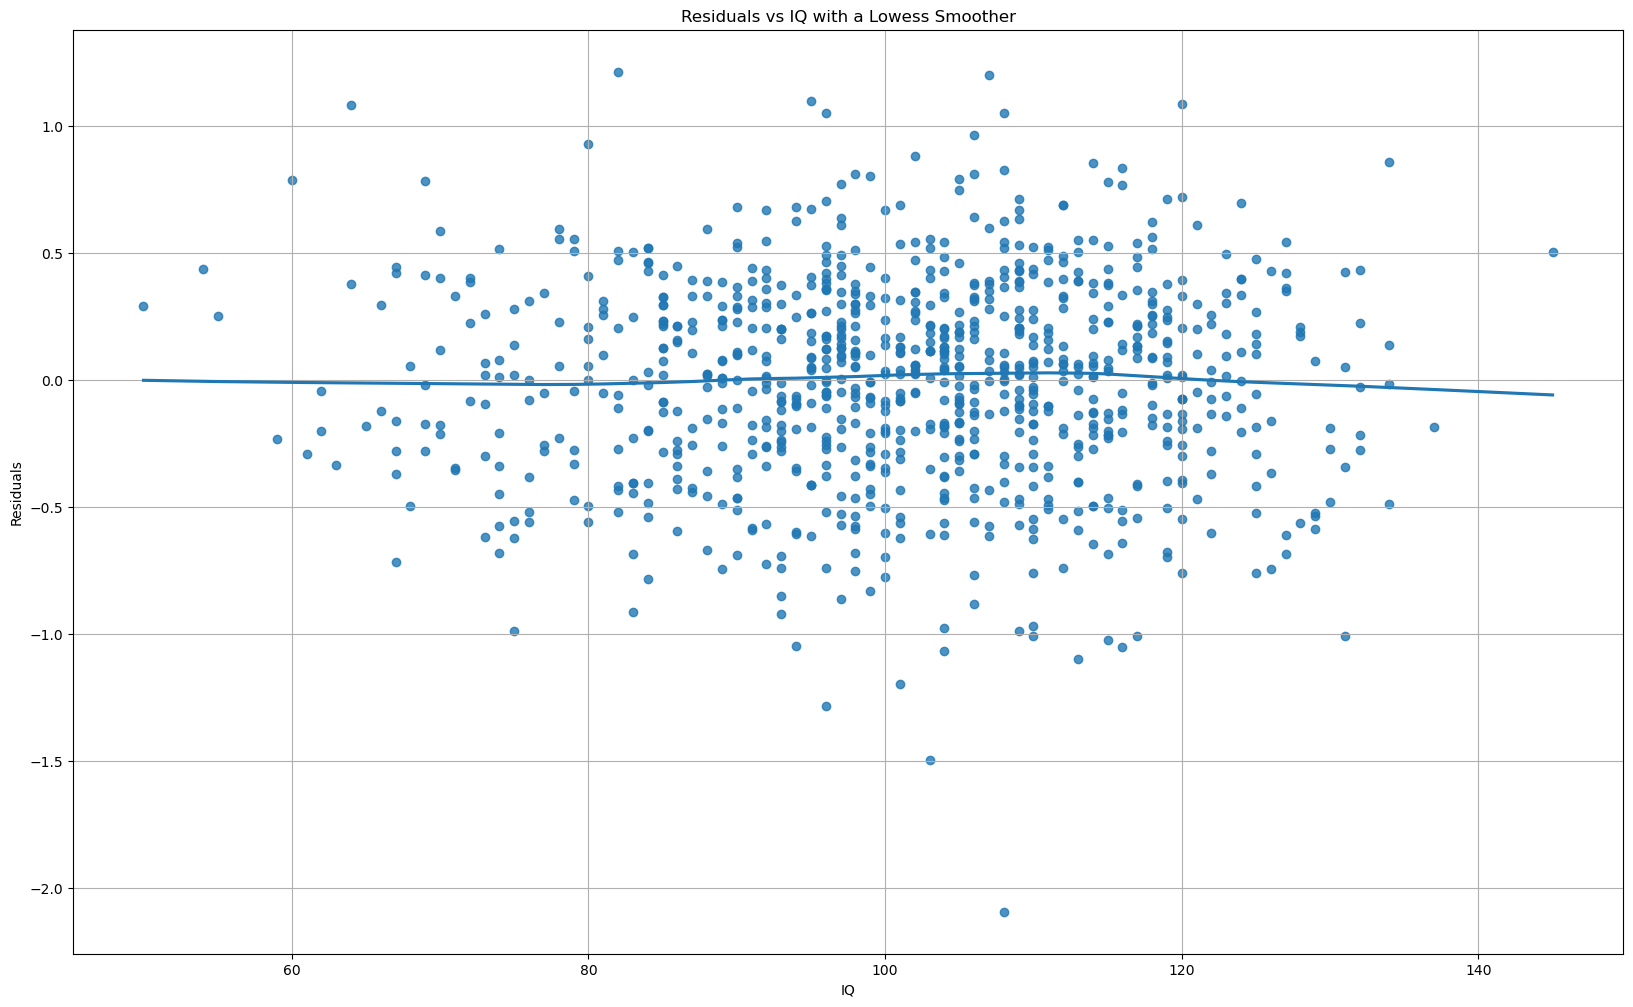

In [6]:
#Creating a plot to visually represent the residuals from the model
wage["residuals"] = results.resid
plt.figure(figsize=(20,12))
sns.regplot(data = wage, y = "residuals", x = "IQ", lowess = True)
plt.title("Residuals vs IQ with a Lowess Smoother")
plt.ylabel("Residuals")
plt.grid()
plt.show()

### Here the residuals are randomly distributed about the "X" parameter IQ, meaning that the errors are "homoskedastic". This means that E[u|x] = 0, or in other words, the error term does not have any systemic correlation with the predictor.

B. Generate a Cook’s distance plot. Do you notice any unusual observations?

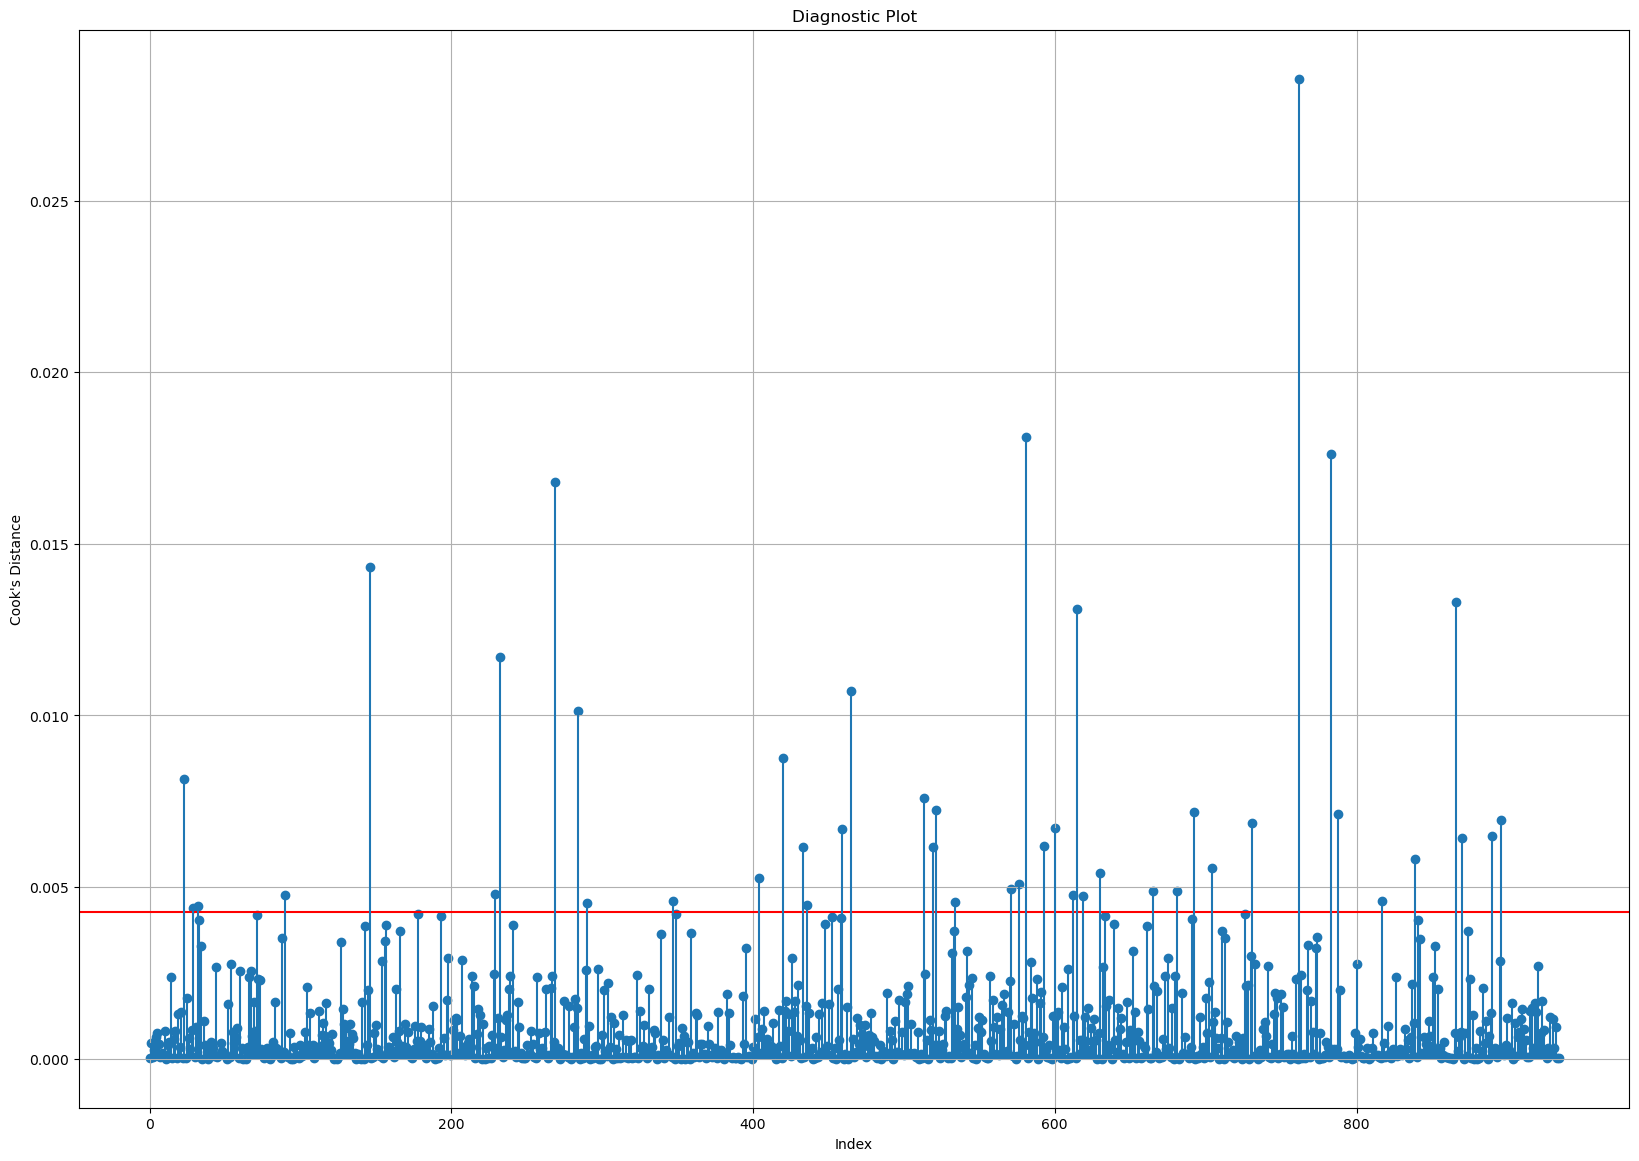

In [7]:
#Generating a cook's distance plot
cooks_distance = results.get_influence().cooks_distance
plt.figure(figsize = (20, 14))
plt.scatter(wage.index, cooks_distance[0])
plt.axhline((4/len(wage)), color = 'red')
plt.vlines(x = wage.index, ymin = 0, ymax = cooks_distance[0])
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.title("Diagnostic Plot")
plt.grid()
plt.show()

There are multiple observations that violate the Cook's distance threshold established, and arise concerns over the quality of predictions made using this data. In particular there are over 12 observations that are close to double the value of the threshold or higher. However, there must be further testing before a decision is made on the inclusion or exclusion of these outlying observations. 

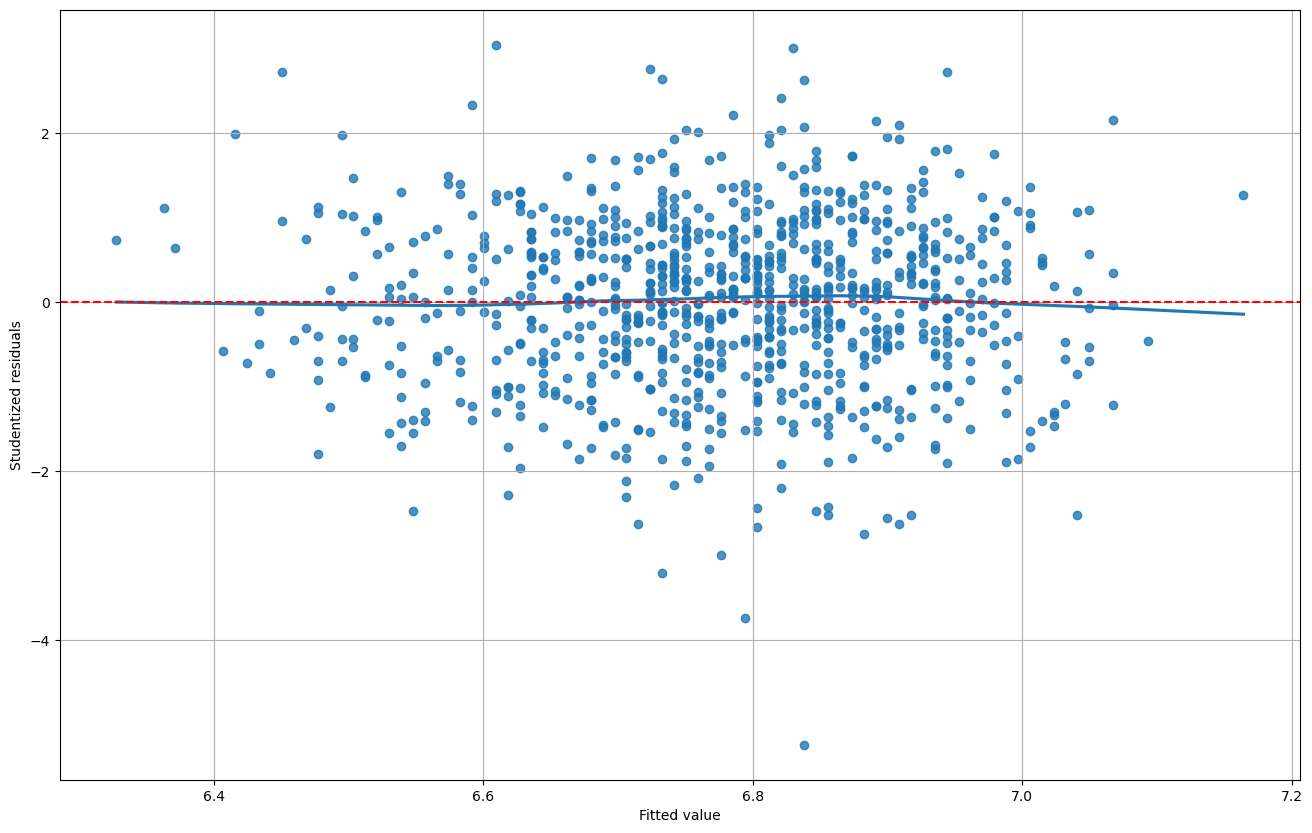

In [8]:
#Generating a plot of studentized residuals and the fitted values
studentized_resid = results.get_influence().resid_studentized
plt.figure(figsize = (16, 10))
sns.regplot(x = results.fittedvalues, y = studentized_resid, lowess = True)
plt.ylabel("Studentized residuals")
plt.xlabel("Fitted value")
plt.axhline(0, color = 'red', linestyle = '--')
plt.grid()

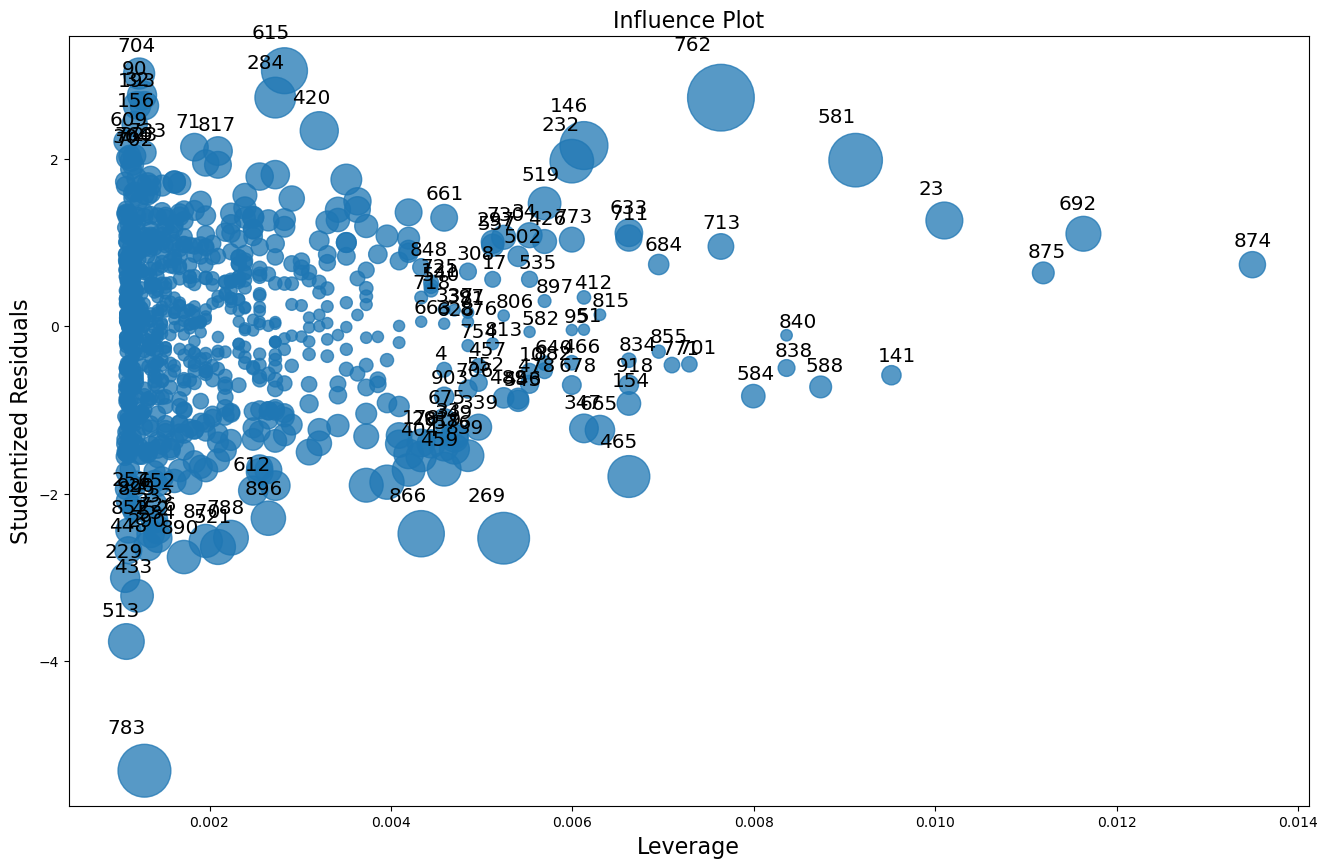

In [9]:
#Generating a general influence plot
fig, ax = plt.subplots(figsize=(16,10))
fig = sm.graphics.influence_plot(results, ax = ax, criterion="cooks")

From the combined influence, leverage, and cook's distance plot, it is quite clear which observations appear to be problematic. Attention must be paid to observations #874, #762, #581, #146, #692, and #23 among others. 

C. Visualize potential influential observations using DFFITS. Based on this plot, do any
observations deserve additional scrutiny?

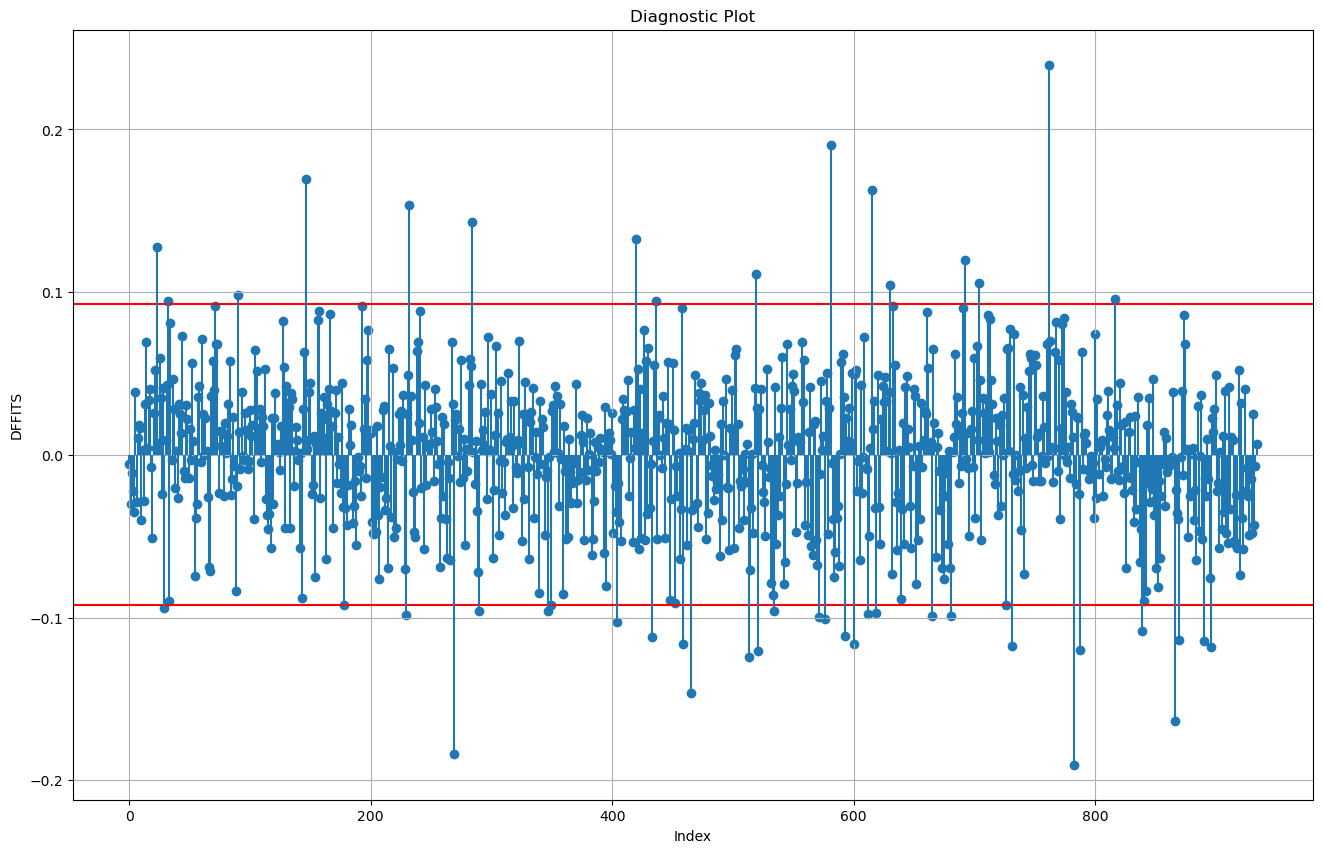

In [10]:
#Generating a DFFITS visualisation based on the estimated model
dffits, threshold = results.get_influence().dffits
plt.figure(figsize=(16,10))
plt.scatter(wage.index, dffits)
plt.axhline(threshold, color="red")
plt.axhline(-threshold, color="red")
plt.vlines(x=wage.index, ymin=0, ymax=dffits)
plt.xlabel("Index")
plt.ylabel("DFFITS")
plt.title("Diagnostic Plot")
plt.grid()
plt.show()

D.  Based on what we’ve learned in class, set a test threshold and remove suspected outliers
using either studentized residuals, DFFITS, or Cook’s Distance as the criteria. Fit a regression on
the new dataset.

In [38]:
#Identifying outliers on the basis of the DFFITS threshold
outliers = (np.abs(dffits) > threshold)
#Culling the outliers from the dataset and creating a new, clean dataset
clean_wage = wage[~outliers]
print("The number of observations in the original dataset is", len(wage))
print("The number of observations in the new dataset is", len(clean_wage))
print("On the basis of the DFFITS threshold,", len(wage)-len(clean_wage), "number of observations have been removed")

The number of observations in the original dataset is 935
The number of observations in the new dataset is 891
On the basis of the DFFITS threshold, 44 number of observations have been removed


In [39]:
#Fitting a new regression model on the new dataset
lsal1 = np.log(clean_wage["wage"])
iq1 = clean_wage["IQ"]
reg_clean = smf.ols("lsal1~iq1", data = clean_wage)
results_clean = reg_clean.fit()
print(results_clean.summary())

                            OLS Regression Results                            
Dep. Variable:                  lsal1   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     133.8
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           6.38e-29
Time:                        10:53:44   Log-Likelihood:                -335.20
No. Observations:                 891   AIC:                             674.4
Df Residuals:                     889   BIC:                             684.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8304      0.084     69.463      0.0

E. Describe how the regression results changed. Are the regression parameters stable? Was
the fit of your regression affected?

### In the original model, the estimate of the beta(coefficient) was 0.0088, with an adjusted R sq. of 0.098. In this new model, the estimate of the beta has risen to 0.095, with a higher adjusted R sq. of 0.130. This is good on two levels. First, the higher coefficient is more reflective of the true relationship between iq and salary, due to the absence of influential observations. Second, the higher adjusted R sq. is reflective of better fit of the model. Another consideration is the drastic reduction in the AIC and BIC, showing better fit.

F. What are some potential concerns that might be balanced when deciding to remove
influential observations?

Dealing with potentially influential observations entails a comprehensive approach to modelling. This means that a balance must be struck between achieving better statistical significance and goodness-of-fit by culling the dataset, and retaining the observations in favour of economic significance. This is particularly true in studies, where the existence of some of the outliers at least can be explained economically. Additionally, alternative models which may deal with such observartions better must be explored and the results be compared before a decision is made to remove observations.

### 4. Use the WAGE1 dataset from the Wooldridge python module to answer the following question. Import this data into your notebook

In [13]:
#importing the packages and dataset
wage1 = woo.data("wage1")
print(wage1.columns)

Index(['wage', 'educ', 'exper', 'tenure', 'nonwhite', 'female', 'married',
       'numdep', 'smsa', 'northcen', 'south', 'west', 'construc', 'ndurman',
       'trcommpu', 'trade', 'services', 'profserv', 'profocc', 'clerocc',
       'servocc', 'lwage', 'expersq', 'tenursq'],
      dtype='object')


A. Consider the following model:
log(wage) = β0 + β1educ + β2exper + β3tenure + β4f emale + β5married + β6numdep
are the residuals from this regression normally distributed? Use a statistical test to support your
conclusion

In [14]:
#Setting up the regression function
reg2 = smf.ols('lwage ~ educ + exper + tenure + female + married + numdep', data=wage1)
results2=reg2.fit()
print(results2.summary())
print("The Jarque-Bera test results are ", stats.jarque_bera(results2.resid))
variance = (results2.resid**2).sum()/(len(results2.resid)-2)
print("The variance of the residuals is ", variance)

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     58.54
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           3.15e-55
Time:                        10:20:43   Log-Likelihood:                -277.50
No. Observations:                 526   AIC:                             569.0
Df Residuals:                     519   BIC:                             598.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4894      0.109      4.492      0.0

The test for normality of residuals is based on the test statistics such as the skewness and kurtosis of the residuals, their variance, and the Jarque-Bera hypothesis test at a 95% confidence level(|t| > 1.96). Comparing all these statistics to their normal distribution level, we see: 

a. Skewness: Normal distribution level is 0, and observed is 0.071. It is close but not actually normally distributed. 

b. Kurtosis: Normal distribution level is 3, and observed is 3.972. More evidence of not being normally distrbuted. 

c. Variance of residuals: Normal distribution level is 0, and observed is 0.168. 

d. Jarque-Bera hypothesis test: The JB test statistic is extremely high at 21.133, and with a relatively high p value of 2.5761e-05, it is safe to conclude that the null hypothesis of the residuals being normally distributed can be rejected. 

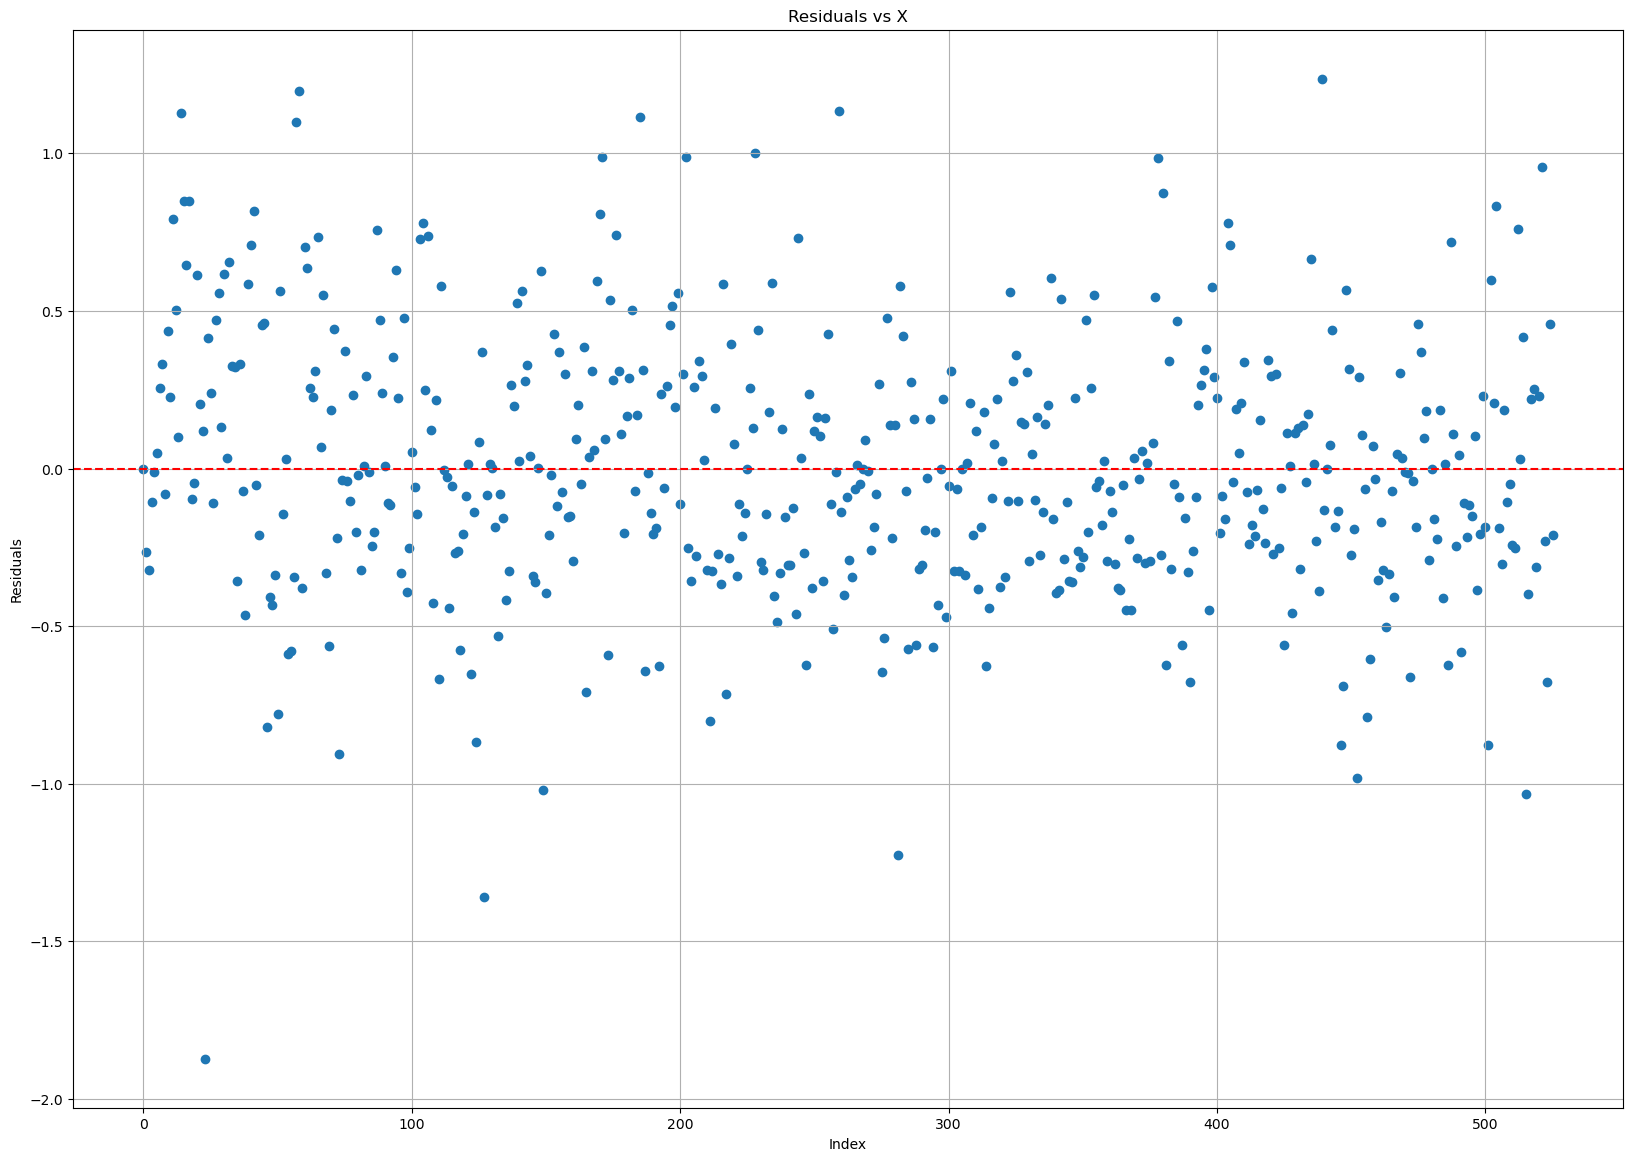

In [15]:
#Plotting the residuals vs X to check for homoskedasticity of error terms
plt.figure(figsize=(20,14))
plt.scatter(x = wage1.index, y = results2.resid)
plt.title("Residuals vs X")
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.axhline(0, color = 'red', linestyle = '--')
plt.grid()
plt.show()

B. In a single plot show the fitted values, observed values, prediction interval, and confidence
interval from the regression in part (a). Use exper as the variable on the x-axis. (Hint: A range
of x-values needs to be included in a dataframe for each dependent variable used in the regression.
This new data is used in get prediction)

In [40]:
#Creating a theoretical distribution of predictors
x_range1 = np.linspace(wage1.exper.min(), wage1.exper.max(), 200)
x_range2 = np.linspace(wage1.educ.min(), wage1.educ.max(), 200)
x_range3 = np.linspace(wage1.tenure.min(), wage1.tenure.max(), 200)
x_range4 = np.linspace(wage1.female.min(), wage1.female.max(), 200)
x_range5 = np.linspace(wage1.married.min(), wage1.married.max(), 200)
x_range6 = np.linspace(wage1.numdep.min(), wage1.numdep.max(), 200)

#Storing the theoretical distributions in one common dataframe
new_data = pd.DataFrame()
new_data["exper"] = x_range1
new_data["educ"] = x_range2
new_data["tenure"] = x_range3
new_data["female"] = x_range4
new_data["married"] = x_range5
new_data["numdep"] = x_range6

         mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0    0.492490  0.108152       0.280019       0.704960     -0.345946   
1    0.503805  0.107172       0.293261       0.714349     -0.334145   
2    0.515119  0.106195       0.306495       0.723744     -0.322350   
3    0.526434  0.105221       0.319723       0.733145     -0.310561   
4    0.537749  0.104251       0.332944       0.742554     -0.298777   
..        ...       ...            ...            ...           ...   
195  2.698880  0.142946       2.418056       2.979704      1.840572   
196  2.710195  0.144003       2.427294       2.993096      1.851205   
197  2.721510  0.145062       2.436529       3.006491      1.861833   
198  2.732825  0.146122       2.445761       3.019888      1.872455   
199  2.744140  0.147183       2.454991       3.033288      1.883072   

     obs_ci_upper  
0        1.330926  
1        1.341754  
2        1.352589  
3        1.363429  
4        1.374275  
..            ...  
195    

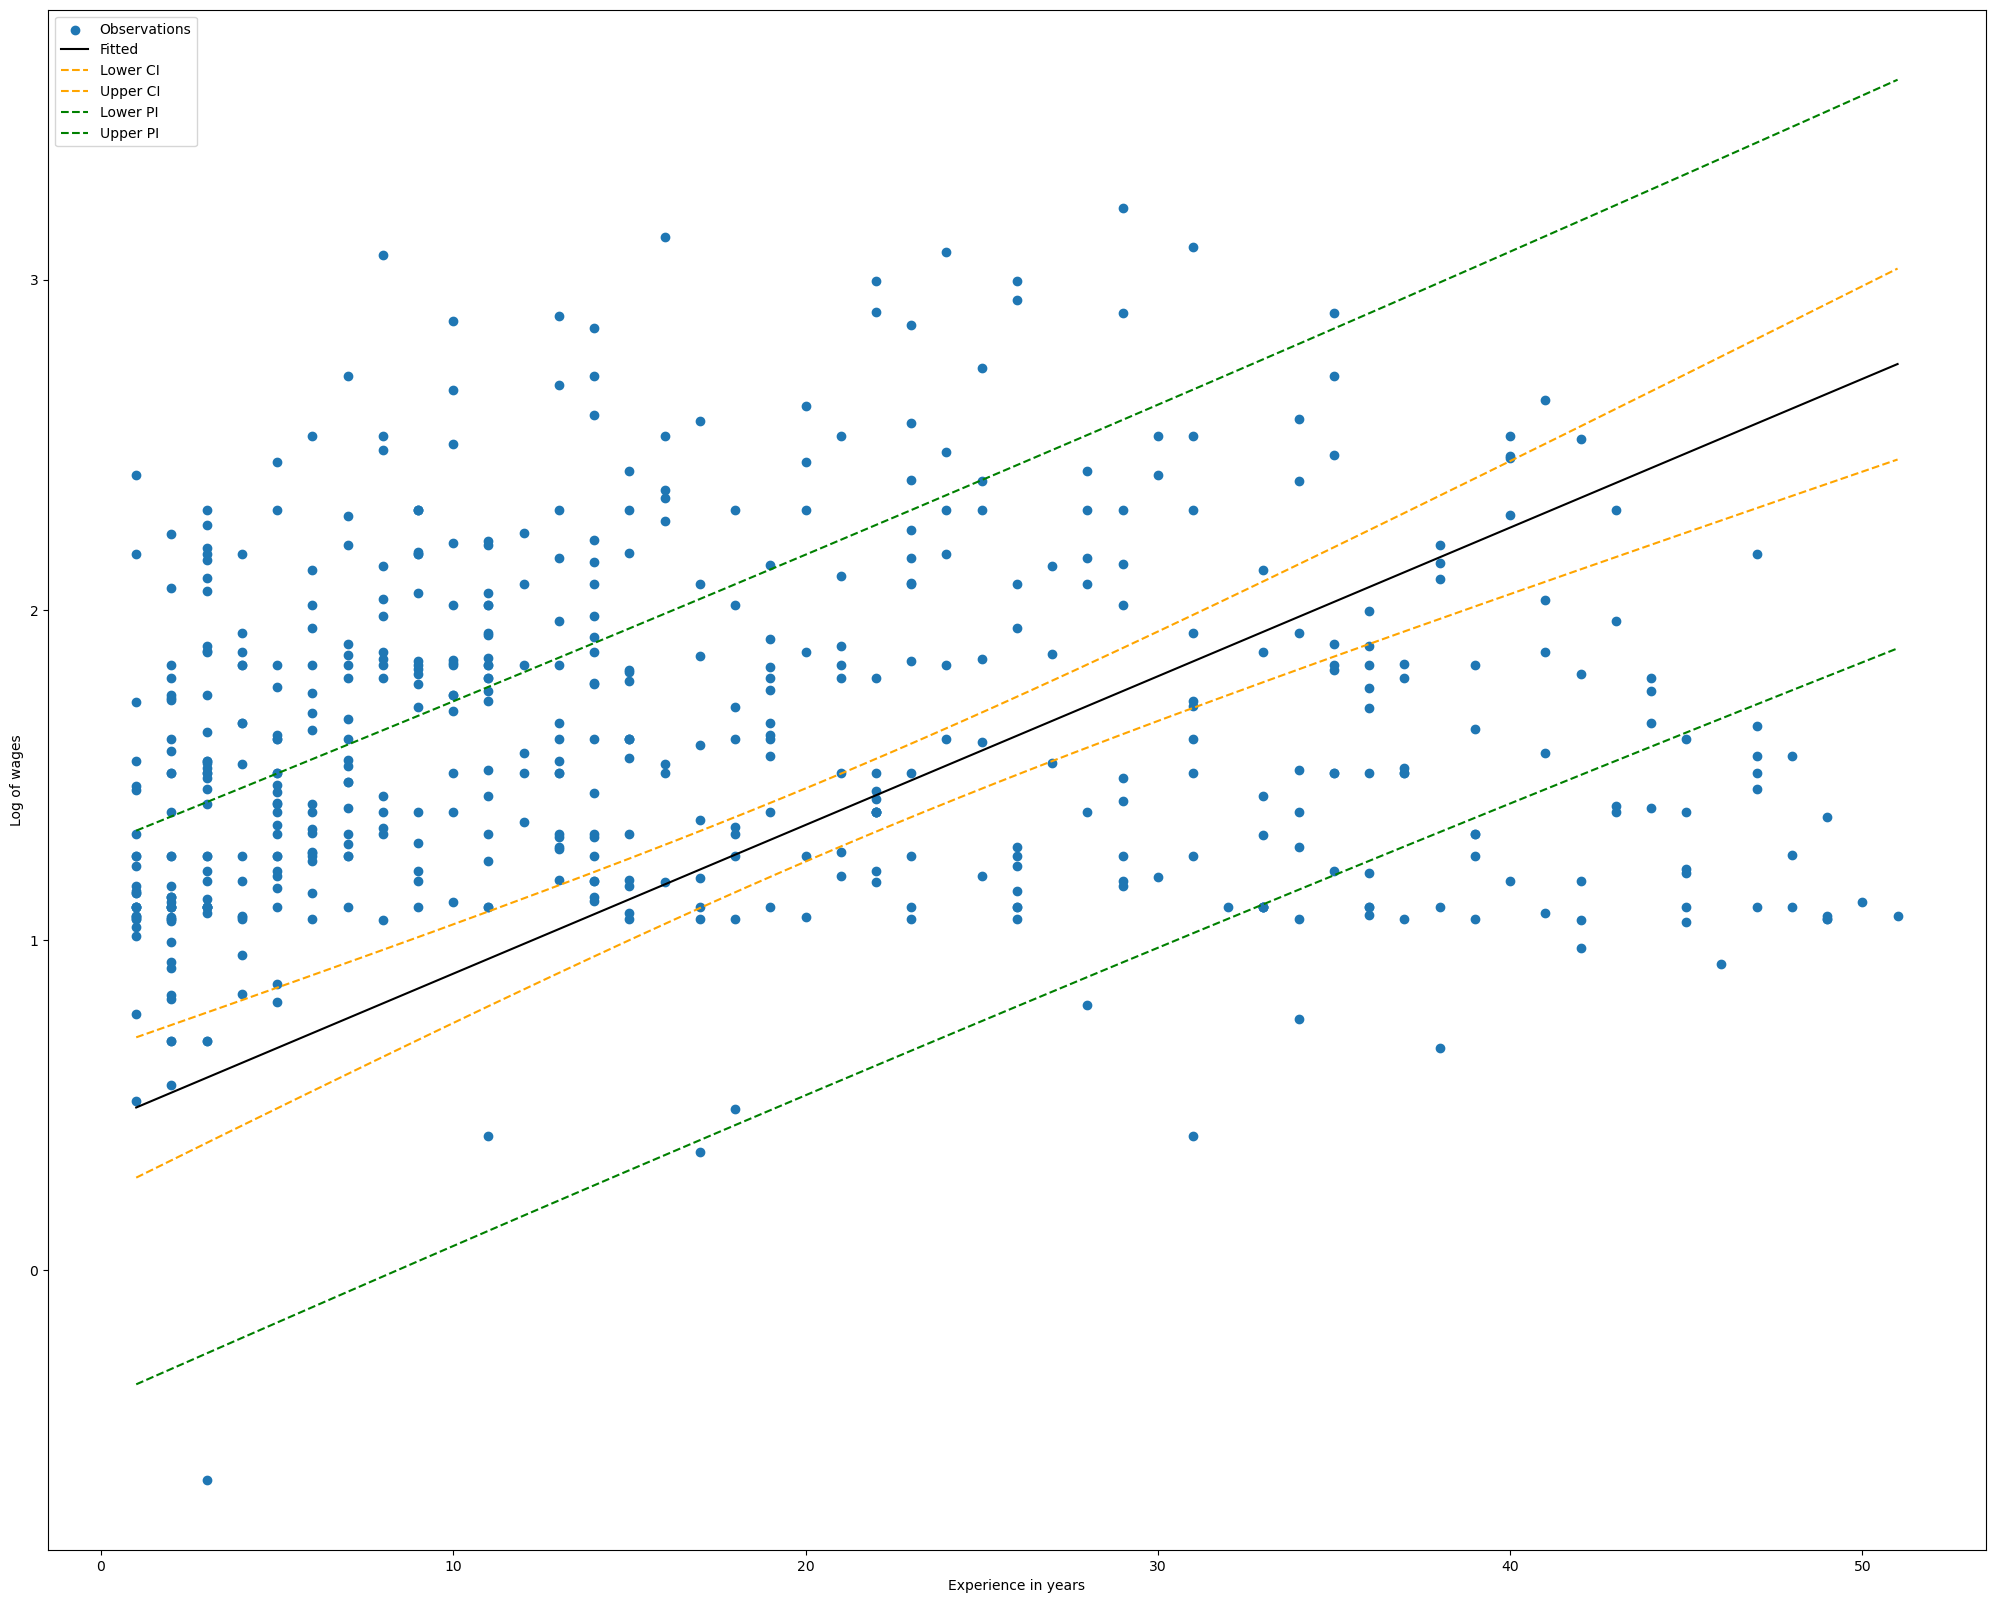

In [17]:
#Using the get_predictions to generate arrays of predictions 
predictions = results2.get_prediction(new_data)
predictions =  predictions.summary_frame(alpha = 0.05)
print(predictions)

#Creating a visual representation of confidence intervals and prediction intervals
plt.figure(figsize=(25,20))
plt.scatter(x = wage1.exper, y = wage1.lwage)
plt.plot(x_range1, predictions["mean"], color="black")

plt.xlabel("Experience in years")
plt.ylabel("Log of wages")

plt.plot(x_range1, predictions["mean_ci_lower"], color = "orange", linestyle = "--")
plt.plot(x_range1, predictions["mean_ci_upper"], color = "orange", linestyle = "--")

plt.plot(x_range1, predictions["obs_ci_lower"], color = "green", linestyle ="--")
plt.plot(x_range1, predictions["obs_ci_upper"], color = "green", linestyle = "--")
plt.legend(["Observations", "Fitted", "Lower CI", "Upper CI", "Lower PI", "Upper PI"])
plt.show()

C. Generate bootstrap standard errors, and a 95% confidence interval for β2 from the
regression in part (a). You may use any of the methods shown in class to generate the bootstrap
CI. Based on this confidence interval, determine whether β2 is different from 0.

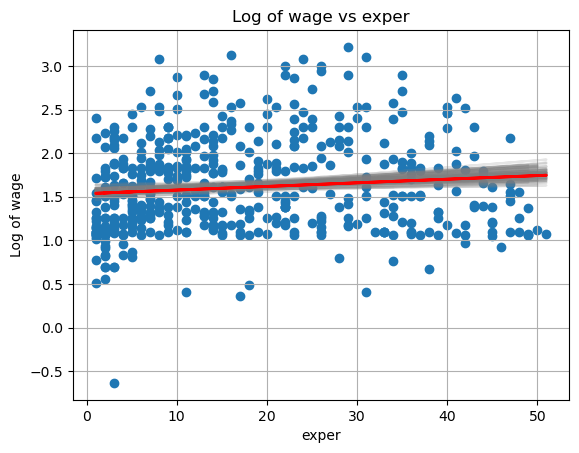

In [18]:
#Setting up the Bootstrap algorithm
boot_slopes = []
boot_interc = []
boot_adjR2 = []
n_boots = 100
n_points = wage1.shape[0]
plt.figure()
for _ in range(n_boots):
 # sample the rows, same size, with replacement
    sample_df = wage1.sample(n=n_points, replace=True)
 # fit a linear regression
    ols_model_temp = smf.ols(formula = 'lwage ~ exper', data=sample_df)
    results_temp = ols_model_temp.fit()
 
 # append coefficients
    boot_interc.append(results_temp.params[0])
    boot_slopes.append(results_temp.params[1])
    boot_adjR2.append(results_temp.rsquared_adj)
 
 # plot a greyed out line
    y_pred_temp = ols_model_temp.fit().predict(sample_df['exper'])
    plt.plot(sample_df['exper'], y_pred_temp, color='grey', alpha=0.2)
# add data points
y_pred = ols_model_temp.fit().predict(wage1['exper'])
plt.scatter(wage1['exper'], wage1['lwage'])
plt.plot(wage1['exper'], y_pred, linewidth=2,color = 'red')
plt.grid(True)
plt.xlabel('exper')
plt.ylabel('Log of wage')
plt.title('Log of wage vs exper')
plt.show()

In [19]:
print(results_temp.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     5.724
Date:                Fri, 10 Nov 2023   Prob (F-statistic):             0.0171
Time:                        10:21:01   Log-Likelihood:                -426.90
No. Observations:                 526   AIC:                             857.8
Df Residuals:                     524   BIC:                             866.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5354      0.038     39.981      0.0

C:\Users\prano\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


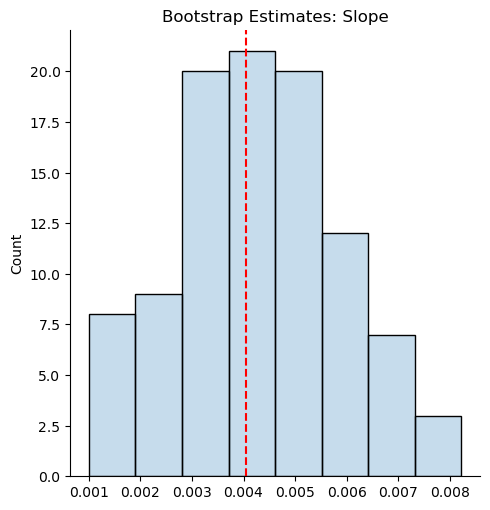

In [20]:
#Plotting the bootstrap estimates along with the actual population parameter
sns.displot(boot_slopes, alpha = 0.25)
plt.axvline(x=0.00405,color='red', linestyle='--')
plt.title('Bootstrap Estimates: Slope')
plt.show()

In [21]:
b2 = results_temp.params.iloc[1]
b2se = results_temp.bse.iloc[1]
print("For a normally distributed variable, the 95% confidence interval refers to a 't-value' of 1.96.\nGiven this value, the 95% confidence interval for the Beta2 can be estimated as follows:")
print("The lower confidence interval is", b2 - 1.96*b2se, "The higher confidence interval is", b2+1.96*b2se)

For a normally distributed variable, the 95% confidence interval refers to a 't-value' of 1.96.
Given this value, the 95% confidence interval for the Beta2 can be estimated as follows:
The lower confidence interval is 0.0007493786842172087 The higher confidence interval is 0.007541334118223277


### Based on the 95% confidence interval estimates and the original model estimate, it is clear that there is a "non-zero" probability that B2 may take on the value of 0. 0 lies within the confidence interval, and is quite close to the original population estimate of 0.031. 

D. Try at least 5 different possible sub-models using Mallow’s CP. Which yielded the best
result according to Mallow’s CP?

In [22]:
#Setting up the Mallow's CP model
model = smf.ols(formula="lwage ~ educ+exper+tenure+female+married+numdep", data=wage1)
results_cp = model.fit()
y = wage1["lwage"]
y_pred_cp=results_cp.fittedvalues

mr_sub = smf.ols(formula="lwage ~ educ+exper+tenure", data=wage1)
mr_sub_fit = mr_sub.fit()
y_sub=mr_sub_fit.fittedvalues

k = 7 # number of parameters in orginal model (includes y-intercept)
p = 4 # number of parameters in the subset model (includes y-intercept)

In [23]:
mallow.mallow(y, y_pred_cp,y_sub, k, p)
subdat = wage1[["lwage", "educ", "exper", "tenure", "female", "married", "numdep"]].copy()

import itertools

storage_cp = pd.DataFrame(columns = ["Variables", "CP"])
k = 7 # number of parameters in orginal model (includes y-intercept)

for L in range(1, len(subdat.columns[1:]) + 1):
    for subset in itertools.combinations(subdat.columns[1:], L):
        
        # join the strings in the data together
        formula1 = "lwage~"+'+'.join(subset)
        
        # get the cp
        results = smf.ols(formula=formula1, data = wage1).fit()
        y_sub = results.fittedvalues
        p = len(subset)+1 # number of parameters in the subset model (includes y-intercept)
        
        cp = mallow.mallow(y, y_pred_cp,y_sub, k, p)
        
        # add to the dataframe
        storage_cp = storage_cp._append({'Variables': subset, 'CP': cp}, ignore_index = True)

In [24]:
storage_cp.sort_values(by = "CP")

,Variables,CP
56,"(educ, exper, tenure, female, married)",5.000309
47,"(educ, tenure, female, married)",6.465083
62,"(educ, exper, tenure, female, married, numdep)",7.000000
60,"(educ, tenure, female, married, numdep)",8.348400
41,"(educ, exper, tenure, female)",12.869873
...,...,...
4,"(married,)",284.482984
13,"(exper, married)",285.850195
14,"(exper, numdep)",332.524923
1,"(exper,)",337.443773


According to Mallow's CP, the model which will yield the best fit will be the model with "educ, exper, tenure, female, and married". As opposed to our original model, it drops the variable "numdep", which Mallow's CP predicts will results in a better overall model. 

E. Using 5-fold cross validation, compare the RMSE of the model in (a) to the one you
chose in (d). Which performs the best?

In [25]:
#Setting up the K-fold cross validation model
reg_best = smf.ols("lwage~educ+exper+tenure+female+married", data = wage1)
results_best = reg_best.fit()
print(results_best.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     70.38
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           3.57e-56
Time:                        10:21:30   Log-Likelihood:                -277.50
No. Observations:                 526   AIC:                             567.0
Df Residuals:                     520   BIC:                             592.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4901      0.101      4.847      0.0

In [26]:
x_kf = wage1[["exper", "educ", "tenure", "female", "married", "numdep"]]
y_kf = wage1["lwage"]
# Perform an OLS fit using all the data
regr = LinearRegression()
model = regr.fit(x_kf,y_kf)
regr.coef_
regr.intercept_

# Split the data into train  (70%)/test(30%) samples:
x_train, x_test, y_train, y_test = train_test_split(x_kf, y_kf, test_size=0.3, random_state=0)

# Train the model:
regr = LinearRegression()
regr.fit(x_train, y_train)

# Make predictions based on the test sample
y_pred_kf = regr.predict(x_test)

# Evaluate Performance
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_kf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_kf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_kf)))

# Perform a 5-fold CV
regr = linear_model.LinearRegression()
scores = cross_val_score(regr, x_kf, y_kf, cv=5, scoring='neg_root_mean_squared_error')
print('5-Fold CV RMSE Scores:', scores)

MAE: 0.3202547488412969
MSE: 0.15878868150333508
RMSE: 0.3984829751737646
5-Fold CV RMSE Scores: [-0.50916902 -0.42983006 -0.38846441 -0.34022502 -0.41420556]


In [27]:
x_kf = wage1[["exper", "educ", "tenure", "female", "married"]]
y_kf = wage1["lwage"]
# Perform an OLS fit using all the data
regr = LinearRegression()
model = regr.fit(x_kf,y_kf)
regr.coef_
regr.intercept_

# Split the data into train  (70%)/test(30%) samples:
x_train, x_test, y_train, y_test = train_test_split(x_kf, y_kf, test_size=0.3, random_state=0)

# Train the model:
regr = LinearRegression()
regr.fit(x_train, y_train)

# Make predictions based on the test sample
y_pred_kf = regr.predict(x_test)

# Evaluate Performance
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_kf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_kf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_kf)))

# Perform a 5-fold CV
regr = linear_model.LinearRegression()
scores = cross_val_score(regr, x_kf, y_kf, cv=5, scoring='neg_root_mean_squared_error')
print('5-Fold CV RMSE Scores:', scores)

MAE: 0.32003242430593354
MSE: 0.15849849484381448
RMSE: 0.39811869441639447
5-Fold CV RMSE Scores: [-0.50834219 -0.42790972 -0.38630742 -0.34018235 -0.41320867]


### Based on the RMSE values returned by K-fold cross validation, it is clear that the model which was suggested by Mallow's CP is superior. With a lower RMSE of 0.39811 as compared to the original models' 0.39848, the Mallow's CP model showcases superior prediction accuracy. The lower the RMSE, the closer the predicted values are to the original observations. This means that by dropping the variable "numdep", we have improved upon the accuracy of the original model.

### 5. Use the VOTE1 dataset from the Wooldridge python module to answer the following question. Import this data into your notebook.

In [28]:
#importing the essential packages and data
vote = woo.data("vote1")
print(vote.columns)
voteA = vote["voteA"]
president = vote["prtystrA"]
spendingA = vote["expendA"]
spendingB = vote["expendB"]
spending_shareA = vote["shareA"]

Index(['state', 'district', 'democA', 'voteA', 'expendA', 'expendB',
       'prtystrA', 'lexpendA', 'lexpendB', 'shareA'],
      dtype='object')


A. Consider a model with an interaction between expenditures:

voteA = β0 + β1prtystrA + β2expendA + β3expendB + β4expendA ∗ expendB

What is the partial effect of expendB on voteA, holding prtystrA and expendA fixed? What is the
partial effect of expendA on voteA? Is the expected sign for b4 obvious?

B.Estimate the equation in part (a) and report the results in the usual form. Is the
interaction term statistically significant?

In [29]:
#Setting up the linear regression function
reg3 = smf.ols("voteA~president+spendingA+spendingB+spendingA*spendingB", data = vote)
results3 = reg3.fit()
print(results3.summary())
print(results3.params)

                            OLS Regression Results                            
Dep. Variable:                  voteA   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     55.86
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           6.77e-30
Time:                        10:21:36   Log-Likelihood:                -659.75
No. Observations:                 173   AIC:                             1329.
Df Residuals:                     168   BIC:                             1345.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              32.1174    

### Based on the model estimated using OLS, the interaction term (spendingA * spendingB) does not have a statistically significant impact on the dependent variable, vote share of Candidate A. This conclusion is based on the hypothesis test conducted at a 95% confidence level, where the absolute t value does not exceed 1.96, and the p-value does not fall below 0.05. Thus, the null hypothesis of it being statistically significant is rejected.

In [30]:
#Generating random values and stationarising other variables to estimate partial effects
xspendingB = np.linspace(spendingB.min(),spendingB.max(), 173)
xspendingA = np.linspace(spendingA.min(), spendingB.max(), 173)
meanpresident = np.mean(president)
meanspendingA = np.mean(spendingA)
meanspendingB = np.mean(spendingB)
y1 = results3.params.iloc[0] + results3.params.iloc[1]*meanpresident + results3.params.iloc[3]*xspendingB +results3.params.iloc[2]*meanspendingA + results3.params.iloc[4]*(meanspendingA*xspendingB)
y2 = results3.params.iloc[0] + results3.params.iloc[1]*meanpresident + results3.params.iloc[2]*xspendingA + results3.params.iloc[3]*meanspendingB + results3.params.iloc[4]*(meanspendingB*xspendingA)

The partial marginal effect of Spending by Candidate B on votes for Candidate A is -0.0317238433138883 + -6.629499051321369e-06 * spendingA


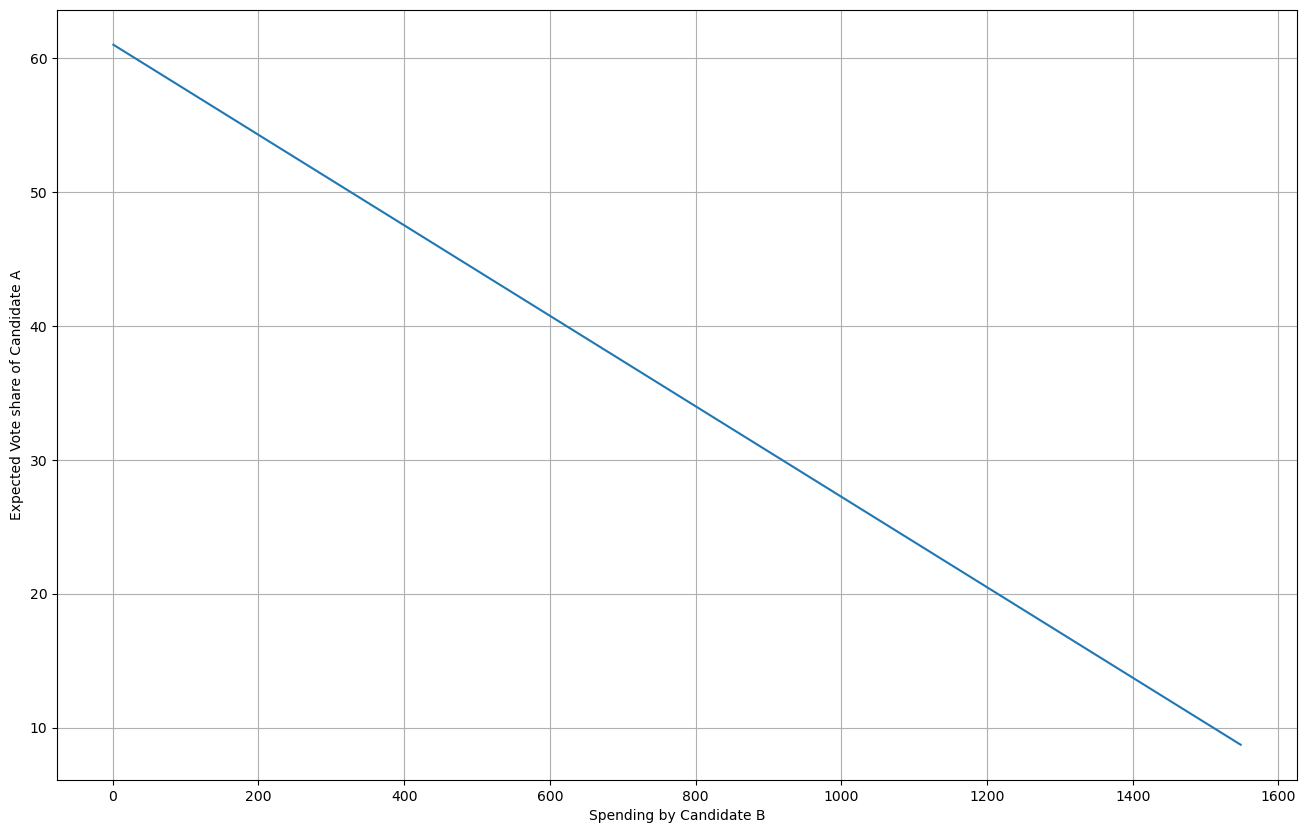

In [31]:
#Plotting the partial effects plots
print("The partial marginal effect of Spending by Candidate B on votes for Candidate A is", results3.params.iloc[3], "+", results3.params.iloc[4], "*", "spendingA")
plt.figure(figsize=(16,10))
plt.plot(xspendingB, y1)
plt.xlabel("Spending by Candidate B")
plt.ylabel("Expected Vote share of Candidate A")
plt.grid()
plt.show()

### Numerically, the partial effect of spending by Candidate B on vote share of Candidate A is represented as a negatively sloped linear equation, and plotted as such too. 

The partial marginal effect of Spending by Candidate A on votes for Candidate A is 0.03828094053319268 + -6.629499051321369e-06 * spendingB


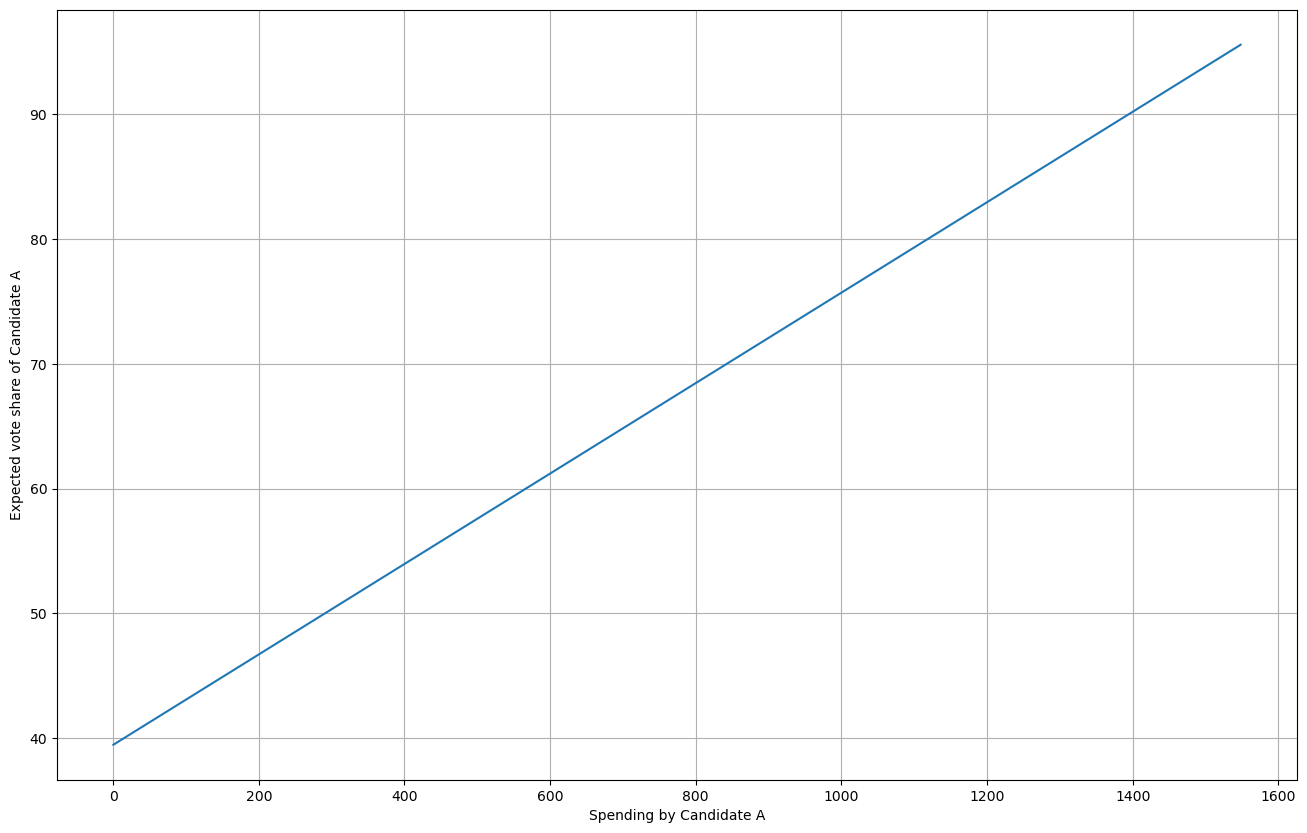

In [32]:
#Plotting the partial effects plots
print("The partial marginal effect of Spending by Candidate A on votes for Candidate A is", results3.params.iloc[2], "+", results3.params.iloc[4], "*", "spendingB")

plt.figure(figsize=(16,10))
plt.plot(xspendingA, y2)
plt.xlabel("Spending by Candidate A")
plt.ylabel("Expected vote share of Candidate A")
plt.grid()
plt.show()

### Numerically, the partial effect of spending by Candidate A on vote share of Candidate A is represented as a negatively sloped linear equation, and plotted as such too. 

### The Expected sign of b4 is a representation of the relationship between the spending by Candidate A and B. It will most likely be negative, as we have already established clear partial marginal effects between these two variables and the vote share of Candidate A. In the case of spending by Candidate B, it is negatively sloped, while it is positively sloped for spending by Candidate B. Thus, the product of both these variables, will generate the interaction term (spendA * spendB) which results in a negative coefficient estimate. 

C. Find the average of expendA in the sample. Fix expendA at 250 (for 250,000). What is
the estimated effect of another 100,000 spent by Candidate B on voteA? Is this a large effect?

The mean of spending by Candidate A in the data is  310.6110049300111


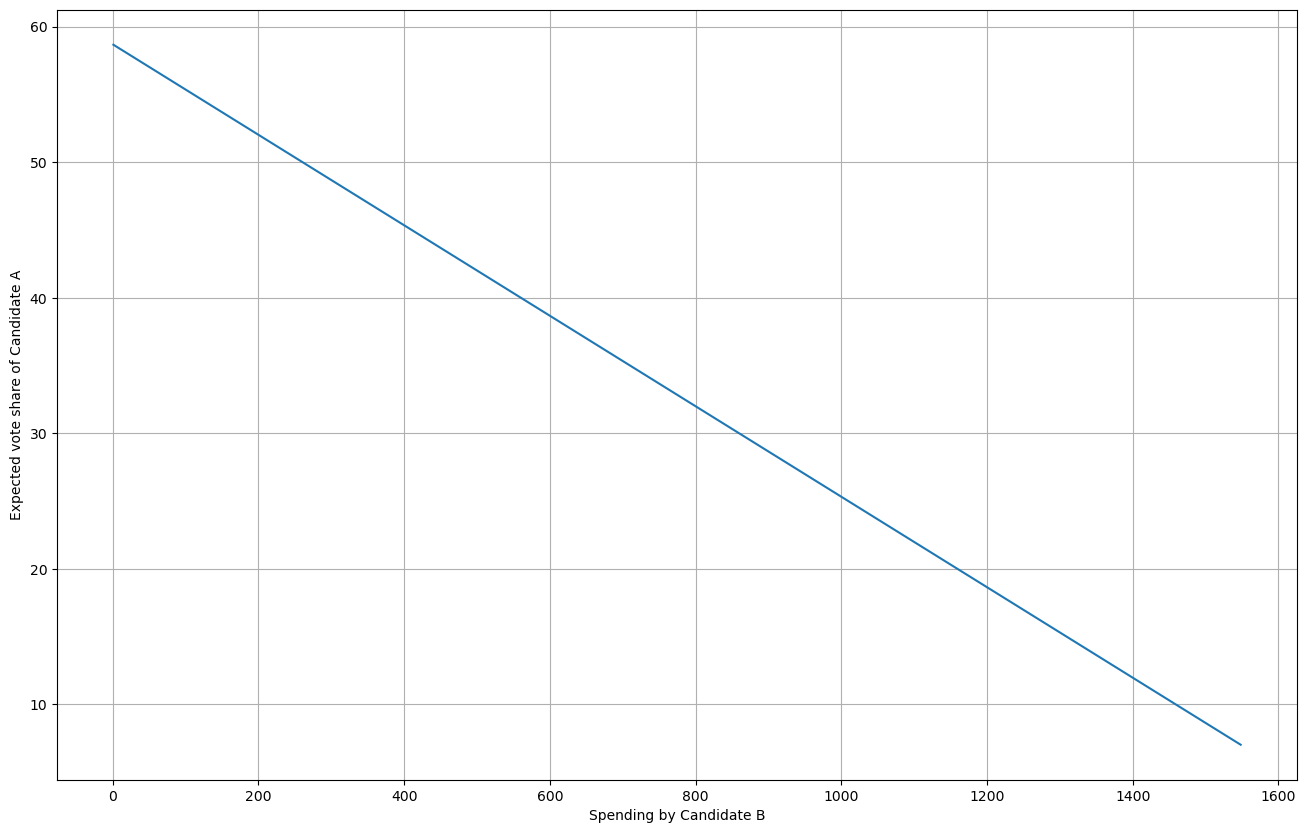

The estimated impact of an additional 100,000 dollars in spending by Candidate B when Candidate A's expenditure is fixed at 250,000 dollars is -3.17404170615166


In [43]:
#Plotting the partial effects plots
print("The mean of spending by Candidate A in the data is ", meanspendingA)
y3 = results3.params.iloc[0] + results3.params.iloc[1]*meanpresident + results3.params.iloc[3]*xspendingB +results3.params.iloc[2]*(250) + results3.params.iloc[4]*(250*xspendingB)
plt.figure(figsize=(16,10))
plt.plot(xspendingB, y3)
plt.xlabel("Spending by Candidate B")
plt.ylabel("Expected vote share of Candidate A")
plt.grid()
plt.show()

pe_100 = results3.params.iloc[3]*100 + results3.params.iloc[4]*250
print("The estimated impact of an additional 100,000 dollars in spending by Candidate B when Candidate A's expenditure is fixed at 250,000 dollars is", pe_100)

### Based on this result, the impact of an additional 100,000 dollars of spending by Candidate B when Candidate A's spending is fixed at 250,000 dollars is -3.170%, or a loss of roughly 3% vote share. This is a significant effect, further reflecting the inverse relationship between spending by Candidate B and the vote share of Candidate A. 

D. Now fix expendB at 90. What is the estimated effect of ∆expendA = 100 on voteA?
Does this make sense?

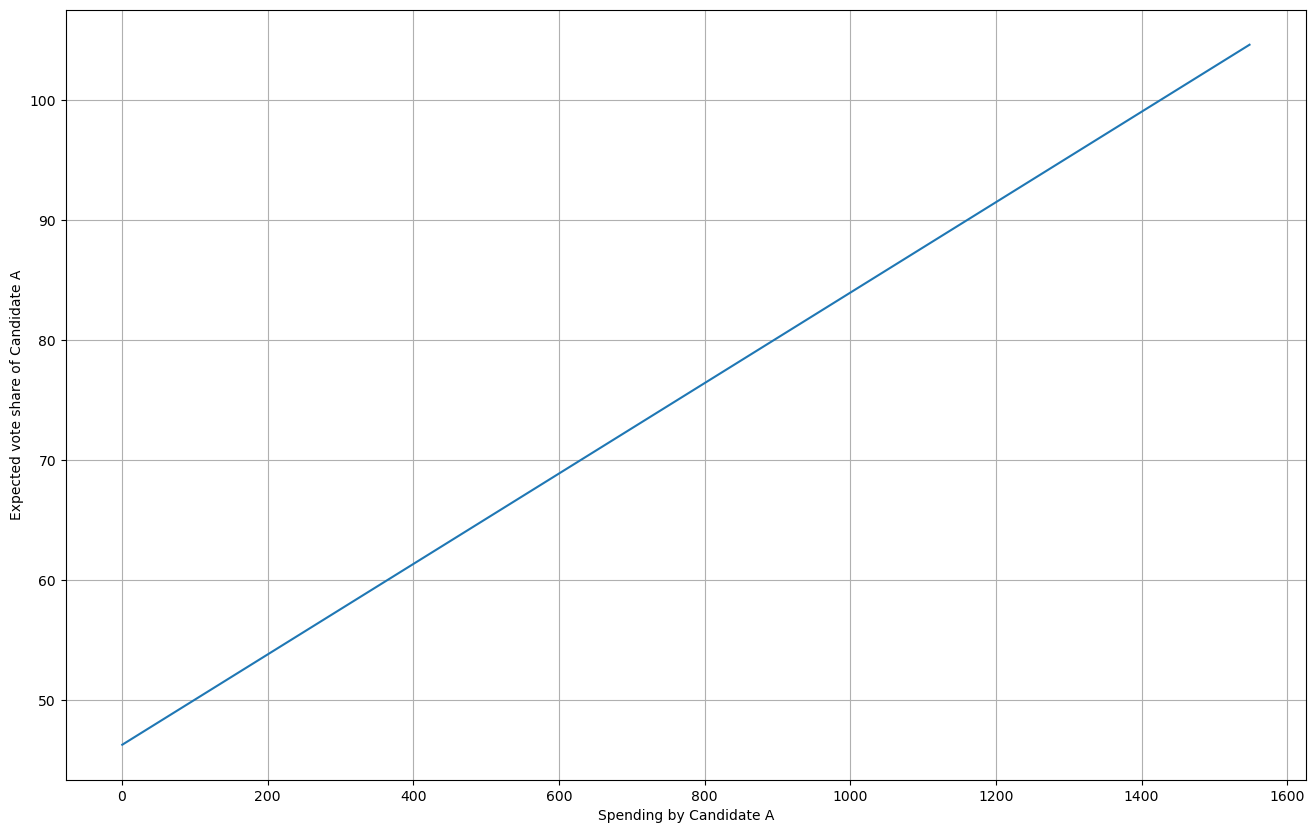

The estimated impact of an additional 100,000 dollars in spending by Candidate A when Candidate B's expenditure is fixed at 90,000 dollars is 3.827497398404649


In [45]:
#Plotting the partial effects plots
y4 = results3.params.iloc[0] + results3.params.iloc[1]*meanpresident + results3.params.iloc[3]*90 +results3.params.iloc[2]*xspendingA + results3.params.iloc[4]*(90*xspendingA)
plt.figure(figsize=(16,10))
plt.plot(xspendingA, y4)
plt.xlabel("Spending by Candidate A")
plt.ylabel("Expected vote share of Candidate A")
plt.grid()
plt.show()

pe_90 = results3.params.iloc[2]*100 + results3.params.iloc[4]*90
print("The estimated impact of an additional 100,000 dollars in spending by Candidate A when Candidate B's expenditure is fixed at 90,000 dollars is", pe_90)

### Again, this result also is in line with the original model, which presented a positive relationship between spending by Candidate A and their vote share. Here, by isolating the partial marginal effect of this variable alone, we are further able to quantify the impact. A 3.827% increase in vote share for candidate A when spending by them increases by 100,000 dollars. 

E. Now, estimate a model that replaces the interaction with shareA, Candidate A’s percent-
age share of total campaign expenditures. Does it make sense to hold both expendA and expendB
fixed, while changing shareA? 

In [35]:
#Setting up the new linear regression model
reg4 = smf.ols("voteA~president+spendingA+spendingB+spending_shareA", data = vote)
results4 = reg4.fit()
print(results4.summary())
print(results4.params)
xspending_shareA = np.linspace(spending_shareA.min(), spending_shareA.max(), 173)

                            OLS Regression Results                            
Dep. Variable:                  voteA   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     276.5
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           9.03e-73
Time:                        10:21:49   Log-Likelihood:                -557.66
No. Observations:                 173   AIC:                             1125.
Df Residuals:                     168   BIC:                             1141.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          18.1954      2.568     

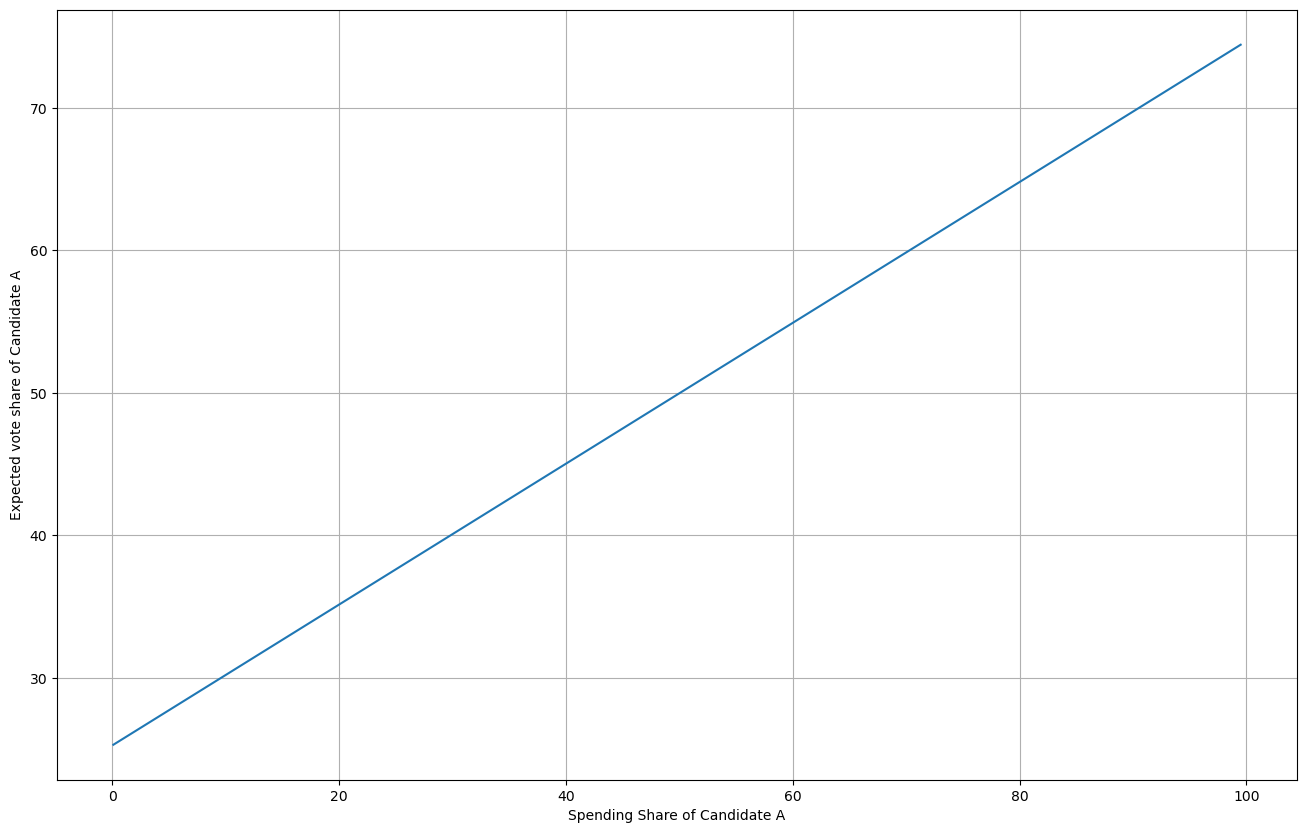

The partial marginal effect of Spending share of Candidate A on votes for Candidate A is 0.4943943596986275


In [36]:
#Plotting the partial effects plots
y5 = results4.params.iloc[0] + results4.params.iloc[1]*meanpresident + results4.params.iloc[2]*meanspendingA + results4.params.iloc[3]*meanspendingB + results4.params.iloc[4]*xspending_shareA
plt.figure(figsize=(16,10))
plt.plot(xspending_shareA, y5)
plt.xlabel("Spending Share of Candidate A")
plt.ylabel("Expected vote share of Candidate A")
plt.grid()
plt.show()
print("The partial marginal effect of Spending share of Candidate A on votes for Candidate A is", results4.params.iloc[4])

### This particular partial effect does not make any logical sense, as it is directly derived from the other two terms which are being held fixed. This means that when the spending by both candidates are frozen, the ratio between both of them will also remain constant. Thus, this partial effect can be disregarded.